# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [41]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

Используя `train_test_split` с параметрами `test_size=0.2`, `random_state=21` получаем `X_train`, `y_train`, `X_test`, `y_test`.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Использование, например, `value_counts()`, чтобы проверить, похоже ли распределение классов в обучении и тестировании.

In [5]:
y_train.value_counts()

3    313
6    287
1    222
5    216
2    125
0    105
4     80
Name: dayofweek, dtype: int64

In [6]:
y_test.value_counts()

3    83
6    69
5    55
1    52
0    31
4    24
2    24
Name: dayofweek, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [8]:
y_train.value_counts()

3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: dayofweek, dtype: int64

In [9]:
y_test.value_counts()

3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: dayofweek, dtype: int64

Видим, что после стратификации распределение по выборкам значительно равномернее.

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

Обучим те же базовые модели, что и в предыдущем упражнении, рассчитаем точность, используя набор тестовых данных со стратификацией.

### a. Logreg

In [12]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.6272189349112426

Точность изменилась. Была 0.6405693950177936

### b. SVM

In [15]:
svc = SVC(kernel='poly', probability=True, random_state=21)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8461538461538461

Точность изменилась. Была 0.8594306049822064

### c. Decision tree

In [18]:
tree = DecisionTreeClassifier(max_depth=10, random_state=21)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7396449704142012

Точность изменилась. Была 0.8196915776986952

### d. Random forest

In [21]:
forest = RandomForestClassifier(max_depth=25, n_estimators=100, random_state=21)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9289940828402367

Точность изменилась. Была 1.0

Больше всего изменилась точность у дерева решений.

## 3. Crossvalidation

Используя `cross_val_score` с `cv=10`, рассчитаем среднюю точность и стандартное отклонение для каждой модели, которую использовали ранее.

### a. Logreg

In [27]:
logreg = LogisticRegression(random_state=21)
param_grid = {'fit_intercept': [True, False],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

cv_logreg = GridSearchCV(logreg, param_grid, scoring='accuracy', n_jobs=-1)
cv_logreg.fit(X_train, y_train)
y_pred = cv_logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.6390532544378699

### b. SVM

In [26]:
svc = SVC(random_state=21)
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability': [True, False]}

cv_svc = GridSearchCV(svc, param_grid, scoring='accuracy', n_jobs=-1)
cv_svc.fit(X_train, y_train)
y_pred = cv_svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8461538461538461

### c. Decision tree

In [30]:
tree = DecisionTreeClassifier(random_state=21)
param_grid = {'max_depth': np.arange(3, 21)}

cv_tree = GridSearchCV(tree, param_grid, scoring='accuracy', n_jobs=-1)
cv_tree.fit(X_train, y_train)
cv_tree.best_params_
y_pred = cv_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8668639053254438

### d. Random forest

In [31]:
forest = RandomForestClassifier(random_state=21)
param_grid = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': np.arange(3, 21)}

cv_forest = GridSearchCV(forest, param_grid, scoring='accuracy', n_jobs=-1)
cv_forest.fit(X_train, y_train)
cv_forest.best_params_
y_pred = cv_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9230769230769231

## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

Выберем лучшую модель и немного поменяем параметры перекрестной проверки.

Рассчитаем точность окончательной модели на тестовом наборе данных.

In [35]:
model = RandomForestClassifier(max_depth=20, n_estimators=60, random_state=21)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9230769230769231

Нарисуем график, отображающий 10 наиболее важных функций этой модели.

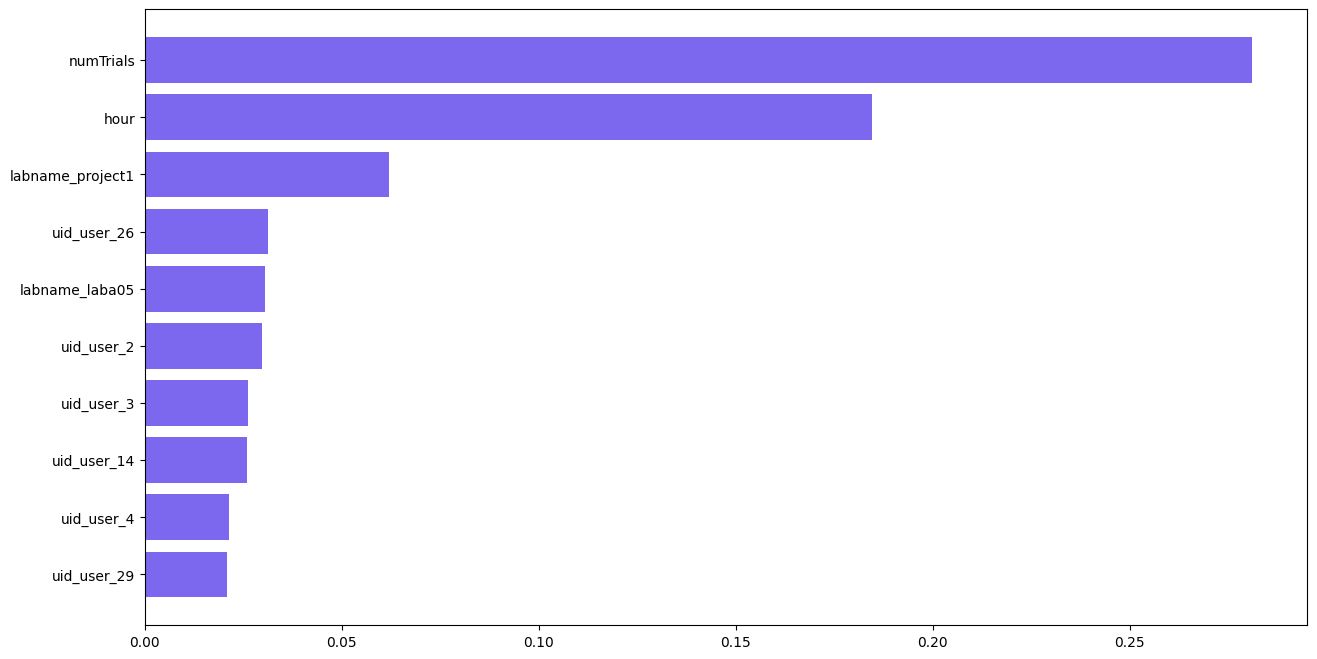

In [38]:
plot_feature_importances(model.feature_importances_, X.columns)

Сохраним модель с помощью `joblib`.

In [42]:
joblib.dump(model, 'best_model.joblib')

['best_model.joblib']

Загрузим модель, сделаем прогнозы для тестового набора данных и рассчитаем точность.

In [43]:
best_model = joblib.load('best_model.joblib')
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9230769230769231